In [ ]:
!pip install youtube_transcript_api

In [ ]:
from youtube_transcript_api import YouTubeTranscriptApi

In [ ]:
from IPython.display import YouTubeVideo

In [ ]:
video=input("Enter the link of your YouTube Video: ")

Enter the link of your YouTube Video: https://www.youtube.com/watch?v=tXVNS-V39A0


In [ ]:
id_video=video.split("=")[1]
print(id_video)

tXVNS-V39A0


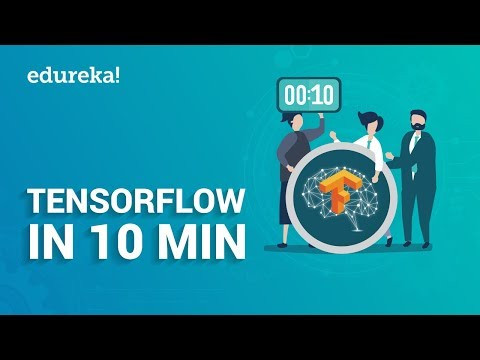

In [ ]:
YouTubeVideo(id_video)

In [ ]:
transcript = YouTubeTranscriptApi.get_transcript(id_video)

In [ ]:
transcript

[{'duration': 2.569,
  'start': 12.0,
  'text': 'Machine learning is\na complex discipline'},
 {'duration': 3.018,
  'start': 14.569,
  'text': 'but implementing machine\nlearning models is far'},
 {'duration': 1.713, 'start': 17.587, 'text': 'less daunting and difficult'},
 {'duration': 1.5, 'start': 19.3, 'text': 'than it used to be. Thanks'},
 {'duration': 3.3,
  'start': 20.8,
  'text': "to machine learning Frameworks\nsuch as Google's TensorFlow"},
 {'duration': 1.5, 'start': 24.1, 'text': 'that ease the process'},
 {'duration': 3.535,
  'start': 25.6,
  'text': 'of acquiring data, training model,\nsolving predictions'},
 {'duration': 2.565,
  'start': 29.135,
  'text': 'and refining future\nresults. Created by'},
 {'duration': 3.406,
  'start': 31.7,
  'text': 'the Google brain team tensorflow\nis an open source library'},
 {'duration': 1.494, 'start': 35.106, 'text': 'for numerical computation'},
 {'duration': 3.511,
  'start': 36.6,
  'text': 'and large scale machine learning.\

In [ ]:
doc = ""
for line in transcript:
    doc =doc+ ' ' + line['text']
print(type(doc))
print(doc)
#print(len(result))

<class 'str'>
 Machine learning is
a complex discipline but implementing machine
learning models is far less daunting and difficult than it used to be. Thanks to machine learning Frameworks
such as Google's TensorFlow that ease the process of acquiring data, training model,
solving predictions and refining future
results. Created by the Google brain team tensorflow
is an open source library for numerical computation and large scale machine learning.
Tensorflow bundles together a study of machine learning and deep learning models and algorithms and make
them useful by way of common metaphor who will use machine learning
and all of its products to improve the search engine
the translation image captioning or the recommendations to give
you a concrete example, Google users can experience
a faster and more refined search with artificial intelligence. If the user types a keyword
in the search bar Google provides a recommendation about
what could be the next world not as a flow is being used

In [ ]:
doc=[]
for line in transcript:
  if "\n" in line['text']:
    x=line['text'].replace("\n"," ")
    doc.append(x)
  else:
    doc.append(line['text'])
print(doc)

['Machine learning is a complex discipline', 'but implementing machine learning models is far', 'less daunting and difficult', 'than it used to be. Thanks', "to machine learning Frameworks such as Google's TensorFlow", 'that ease the process', 'of acquiring data, training model, solving predictions', 'and refining future results. Created by', 'the Google brain team tensorflow is an open source library', 'for numerical computation', 'and large scale machine learning. Tensorflow bundles together', 'a study of machine learning', 'and deep learning models', 'and algorithms and make them useful by way', 'of common metaphor', 'who will use machine learning and all of its products', 'to improve the search engine the translation image captioning', 'or the recommendations to give you a concrete example,', 'Google users can experience a faster and more refined search', 'with artificial intelligence.', 'If the user types a keyword in the search bar Google', 'provides a recommendation about what c

In [ ]:
paragraph=" ".join(doc)
print(paragraph)

Machine learning is a complex discipline but implementing machine learning models is far less daunting and difficult than it used to be. Thanks to machine learning Frameworks such as Google's TensorFlow that ease the process of acquiring data, training model, solving predictions and refining future results. Created by the Google brain team tensorflow is an open source library for numerical computation and large scale machine learning. Tensorflow bundles together a study of machine learning and deep learning models and algorithms and make them useful by way of common metaphor who will use machine learning and all of its products to improve the search engine the translation image captioning or the recommendations to give you a concrete example, Google users can experience a faster and more refined search with artificial intelligence. If the user types a keyword in the search bar Google provides a recommendation about what could be the next world not as a flow is being used by a lot of Co

#NLTK Summarization

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
mytext= paragraph

In [ ]:
stops = set(stopwords.words('english'))
word_array = word_tokenize(mytext)

wordfreq=dict()
for word in word_array:
  word=word.lower()
  if word in stops:
    continue
  elif word in wordfreq:
    wordfreq[word]+=1
  else:
    wordfreq[word]=1

#word_array
#frequencytable


In [ ]:
sent_array=sent_tokenize(mytext)

sentfreq=dict()
for sentence in sent_array:
  for word,freq in wordfreq.items():
    if word in sentence.lower():
      if sentence in sentfreq:
        sentfreq[sentence]+=freq
      else:
        sentfreq[sentence]=freq  

#sentfreq

In [ ]:
averageval=0
for sentence in sentfreq:
  averageval+=sentfreq[sentence]

average=int(averageval/len(sentfreq))

In [ ]:
summary=''
for sentence in sent_array:
  if(sentence in sentfreq) and (sentfreq[sentence]>(1.5*average)):
    summary=summary+" "+sentence
print(summary)

 Thanks to machine learning Frameworks such as Google's TensorFlow that ease the process of acquiring data, training model, solving predictions and refining future results. Tensorflow bundles together a study of machine learning and deep learning models and algorithms and make them useful by way of common metaphor who will use machine learning and all of its products to improve the search engine the translation image captioning or the recommendations to give you a concrete example, Google users can experience a faster and more refined search with artificial intelligence. The Airbnb ingenious and data science team applies machine learning using tensorflow to classify the images and detect objects at scale helping to improve the guest experience and we talked about the healthcare industry using tensorflow GE Healthcare is training a neural network to identify specific anatomic during the brain MRI exam to help improve speed and reliability now PayPal is using it as a flow to stay at The 

#Spacy Summarization


In [ ]:
!pip install spacy
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [ ]:
stopwords=list(STOP_WORDS)
from string import punctuation
punctuation=punctuation+ '\n'
#punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~\n'

In [ ]:
text=paragraph
space = spacy.load('en_core_web_sm')
doc= space(text)

In [ ]:
word_frequencies={}
for word in doc:
  if word.text.lower() not in stopwords:
      if word.text.lower() not in punctuation:
          if word.text not in word_frequencies.keys():
              word_frequencies[word.text] = 1
          else:
              word_frequencies[word.text] += 1

In [ ]:
max_frequency=max(word_frequencies.values())
for word in word_frequencies.keys():
  word_frequencies[word]=word_frequencies[word]/max_frequency

In [ ]:
sentence_tokens= [sent for sent in doc.sents]
sentence_scores = {}
for sent in sentence_tokens:
  for word in sent:
      if word.text.lower() in word_frequencies.keys():
          if sent not in sentence_scores.keys():                            
            sentence_scores[sent]=word_frequencies[word.text.lower()]
          else:
            sentence_scores[sent]+=word_frequencies[word.text.lower()]
#sentence_scores  

{Machine learning is a complex discipline but implementing machine learning models is far less daunting and difficult than it used to be.: 3.894736842105263,
 Thanks to machine learning Frameworks such as Google's TensorFlow that ease the process of acquiring data, training model, solving predictions and refining future results.: 4.263157894736841,
 Created by the Google brain team tensorflow is an open source library for numerical computation and large scale machine learning.: 3.5263157894736836,
 Tensorflow bundles together a study of machine learning and deep learning models and algorithms and make them useful by way of common metaphor who will use machine learning and all of its products to improve the search engine the translation image captioning or the recommendations to give you a concrete example, Google users can experience a faster and more refined search with artificial intelligence.: 7.894736842105259,
 If the user types a keyword in the search bar: 0.3684210526315789,
 Go

In [ ]:
percent=int(input("How much percentage of summary you want? "))
ratio=(int(percent)) / 100
#ratio

How much percentage of summary you want? 30


In [ ]:
from heapq import nlargest
select_length=int(len(sentence_tokens)*ratio)
select_length
summary=nlargest(select_length, sentence_scores,key=sentence_scores.get)
summary

[Usually any machine learning or deep learning process has some similar steps, but in this case of terms of flow it is so simple any typical machine learning life Lord any process has some of the steps like collection of data set than building the model training the network evaluating the model and then predicting the outcome in case of tensorflow.,
 Tensorflow bundles together a study of machine learning and deep learning models and algorithms and make them useful by way of common metaphor who will use machine learning and all of its products to improve the search engine the translation image captioning or the recommendations to give you a concrete example, Google users can experience a faster and more refined search with artificial intelligence.,
 Each node in the graph represents a mathematical operation and each connection or Edge between the notes is a multi-dimensional data array or tensile test flow provides all of this for the programmer by way of the Python language by then is

In [ ]:
final_summary=[word.text for word in summary]
final_summary
summary=''.join(final_summary)
summary

"Usually any machine learning or deep learning process has some similar steps, but in this case of terms of flow it is so simple any typical machine learning life Lord any process has some of the steps like collection of data set than building the model training the network evaluating the model and then predicting the outcome in case of tensorflow.Tensorflow bundles together a study of machine learning and deep learning models and algorithms and make them useful by way of common metaphor who will use machine learning and all of its products to improve the search engine the translation image captioning or the recommendations to give you a concrete example, Google users can experience a faster and more refined search with artificial intelligence.Each node in the graph represents a mathematical operation and each connection or Edge between the notes is a multi-dimensional data array or tensile test flow provides all of this for the programmer by way of the Python language by then is easy 